#Section I : Package Installations and Imports

In [2]:
!pip install tensorflow

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn import tree

from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from keras import utils
from keras.optimizers import Adam
from keras.layers import LSTM, Dense
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.optimizers import Nadam

Mount Google Drive to get the dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Section II : Data Loading and Preprocessing

In [5]:
path1 = "/content/drive/MyDrive/MLData/2022.06.12.csv"
df1 = pd.read_csv(path1)
print("The shape of first 2022.06.12.csv is {}".format(df1.shape))

path2 = "/content/drive/MyDrive/MLData/2022.06.13.csv"
df2 = pd.read_csv(path2)
print("The shape of first 2022.06.13.csv is {}".format(df2.shape))

path3 = "/content/drive/MyDrive/MLData/2022.06.14.csv"
df3 = pd.read_csv(path3)
print("The shape of first 2022.06.14.csv is {}".format(df3.shape))

The shape of first 2022.06.12.csv is (26167, 16)
The shape of first 2022.06.13.csv is (452123, 16)
The shape of first 2022.06.14.csv is (590086, 16)


In [6]:
df1 = df1.append(df2,ignore_index=True)
df1 = df1.append(df3,ignore_index=True)

<ipython-input-6-e10e6f7a835d>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(df2,ignore_index=True)
<ipython-input-6-e10e6f7a835d>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(df3,ignore_index=True)


In [7]:
print("The shape of combined csv of 2022.06.12.csv,2022.06.13.csv,2022.06.14.csv is {}".format(df1.shape))

The shape of combined csv of 2022.06.12.csv,2022.06.13.csv,2022.06.14.csv is (1068376, 16)


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068376 entries, 0 to 1068375
Data columns (total 16 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   avg_ipt        1068376 non-null  float64
 1   bytes_in       1068376 non-null  int64  
 2   bytes_out      1068376 non-null  int64  
 3   dest_ip        1068376 non-null  int64  
 4   dest_port      964168 non-null   float64
 5   entropy        1068376 non-null  float64
 6   num_pkts_out   1068376 non-null  int64  
 7   num_pkts_in    1068376 non-null  int64  
 8   proto          1068376 non-null  int64  
 9   src_ip         1068376 non-null  int64  
 10  src_port       964168 non-null   float64
 11  time_end       1068376 non-null  int64  
 12  time_start     1068376 non-null  int64  
 13  total_entropy  1068376 non-null  float64
 14  label          1068376 non-null  object 
 15  duration       1068376 non-null  float64
dtypes: float64(6), int64(9), object(1)
memory usage: 130.4

In [9]:
df_original = df1

In [10]:
df1['label'].value_counts()

benign       517210
outlier      440178
malicious    110988
Name: label, dtype: int64

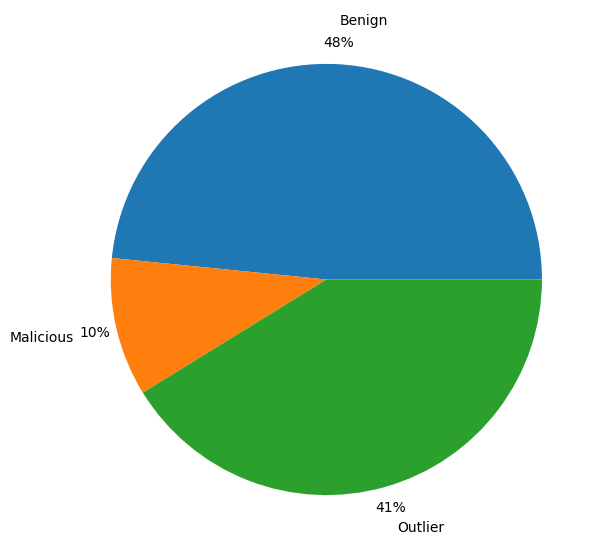

In [11]:
data = [517210, 110988, 440178 ]
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = ["Benign","Malicious","Outlier"], autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)

# show plot
plt.show()

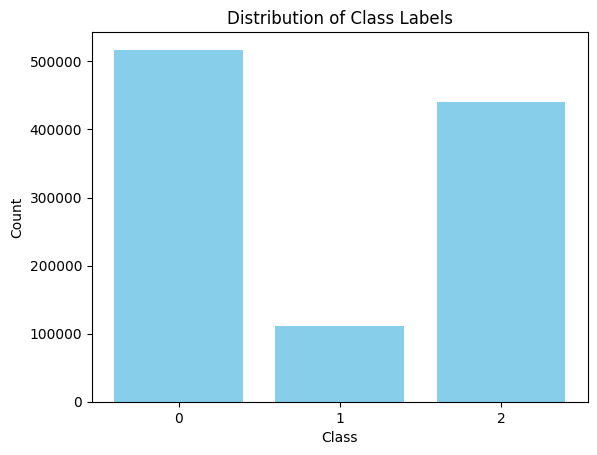

In [57]:
#Graph: Class Ditribution (imbalanced dataset)
class_counts = df1['label'].value_counts()

# Plot a bar graph
plt.bar(class_counts.index, class_counts.values, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Class Labels')
plt.xticks(class_counts.index)
plt.show()

In [13]:
new_df1 = df_original
new_df1.groupby("label").count()

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,duration
label,,,,,,,,,,,,,,,
benign,517210,517210,517210,517210,517209,517210,517210,517210,517210,517210,517209,517210,517210,517210,517210
malicious,110988,110988,110988,110988,78116,110988,110988,110988,110988,110988,78116,110988,110988,110988,110988
outlier,440178,440178,440178,440178,368843,440178,440178,440178,440178,440178,368843,440178,440178,440178,440178


Replacing NaN values with the Mode of its respective column.

In [14]:
for column in new_df1.columns:
    mode_value = new_df1[column].mode()[0]
    new_df1[column].fillna(mode_value, inplace=True)

In [15]:
new_df1['label'].value_counts()

benign       517210
outlier      440178
malicious    110988
Name: label, dtype: int64

In [16]:
#Dropping Duplicate Values.
new_df = new_df1[new_df1.duplicated(new_df1.columns)]

In [17]:
len(new_df1)

1068376

In [18]:
new_df1.drop_duplicates()

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
0,0.0,0,0,786,31306.0,0.000000,1,0,6,786,47613.0,1655074782132491,1655074782132491,0.000000,outlier,0.000000
1,0.0,0,0,786,24298.0,0.000000,1,0,6,786,47613.0,1655074782573321,1655074782573321,0.000000,outlier,0.000000
2,0.0,0,0,786,31789.0,0.000000,1,0,6,786,47613.0,1655074783148517,1655074783148517,0.000000,outlier,0.000000
3,0.0,0,0,786,29409.0,0.000000,1,0,6,786,47613.0,1655074783149855,1655074783149855,0.000000,outlier,0.000000
4,0.0,0,0,786,60965.0,0.000000,1,0,6,786,47613.0,1655074783167254,1655074783167254,0.000000,outlier,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068371,0.0,8,8,786,9200.0,2.750000,1,1,1,786,9200.0,1655251159437561,1655251159437507,43.999996,outlier,0.000054
1068372,0.0,8,8,786,9200.0,3.000000,1,1,1,786,9200.0,1655251163506977,1655251163506891,47.999996,outlier,0.000086
1068373,144.5,12,12,786,5900.0,2.886842,5,5,6,786,40270.0,1655251162155812,1655251161718072,69.284210,outlier,0.437740
1068374,20.0,7,0,786,23.0,2.807355,3,2,6,786,42835.0,1655251171501538,1655251171463225,19.651487,outlier,0.038313


One-hot Encoding

1.   0 - Benign
2.   1 - Malicious
3.   2 - Outlier



<Axes: >

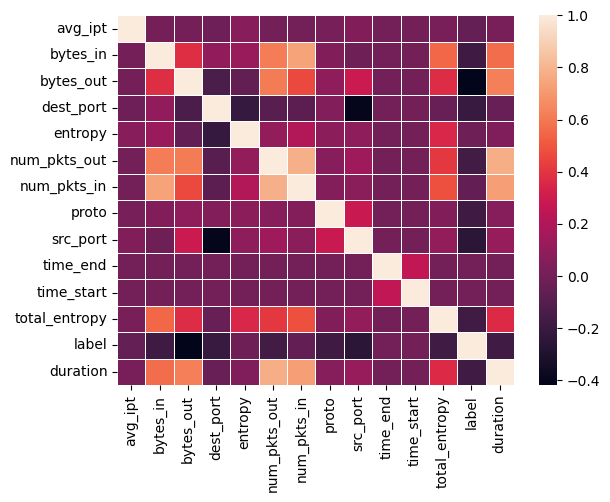

In [19]:
new_df_encoded = pd.get_dummies(new_df1,columns = ['label'])
new_df1['label'].replace(["benign","malicious","outlier"],[0,1,2],inplace = True)
new_df1.drop(['src_ip','dest_ip'], axis=1, inplace= True)
new_df1.corr()
sns.heatmap(new_df1.corr(),linecolor="white",linewidth = 0.5)

SMOTE

In [23]:
df_sampling = df_original

In [24]:
for column in df_sampling.columns:
    mode_value = df_sampling[column].mode()[0]
    df_sampling[column].fillna(mode_value, inplace=True)

In [25]:
df_sampling['label'].replace(["benign","malicious","outlier"],[0,1,2],inplace = True)

<Axes: >

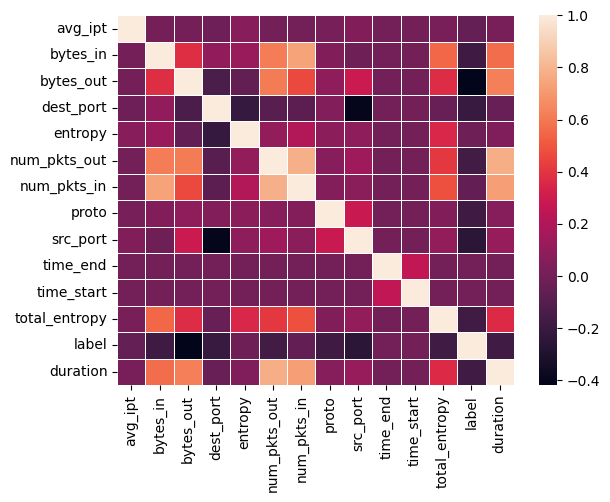

In [27]:
sns.heatmap(df_sampling.corr(),linecolor="white",linewidth = 0.5)

In [28]:
df_sampling['label'].value_counts()

0    517210
2    440178
1    110988
Name: label, dtype: int64

In [29]:
#spliting the dataset

X = df_sampling.loc[:,["avg_ipt","bytes_in","bytes_out","entropy","num_pkts_out","num_pkts_in","proto","total_entropy","duration"]]
y = df_sampling.loc[:,['label']]

print("type of X is {}".format(type(X)))
print("type of y is {}".format(type(y)))

type of X is <class 'pandas.core.frame.DataFrame'>
type of y is <class 'pandas.core.frame.DataFrame'>


In [30]:
# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit and transform the DataFrame
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [31]:
X_resampled, y_resampled = SMOTE().fit_resample(X_scaled, y)

In [32]:
Counter(y_resampled.label)

Counter({2: 517210, 1: 517210, 0: 517210})

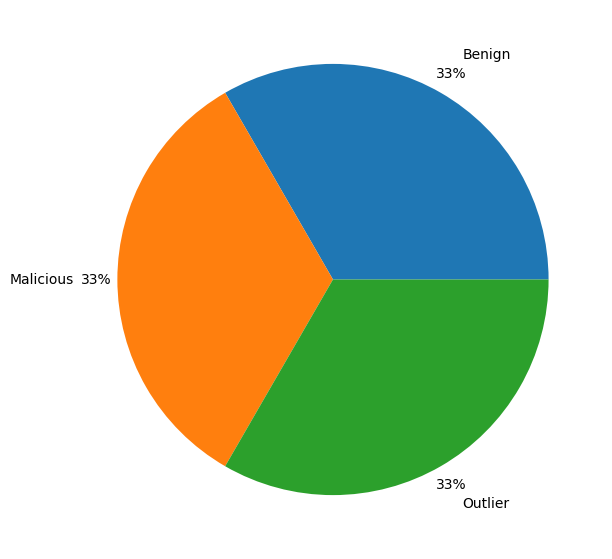

In [33]:
data = [517210, 517210, 517210]
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = ["Benign","Malicious","Outlier"], autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)

# show plot
plt.show()

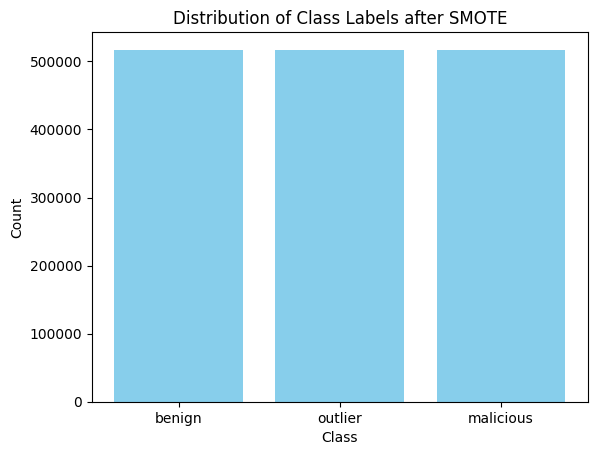

In [56]:
#Graph Class Distribution after SMOTE
counts = [517210, 517210, 517210]
labels = ['benign', 'outlier', 'malicious']
plt.bar(labels, counts, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Class Labels after SMOTE')
plt.show()

#Section - III : Traditional Machine Learning Models

In [34]:
X_train, X_rest, y_train, y_rest = train_test_split(X_resampled,y_resampled,train_size=0.70,stratify=y_resampled, random_state = 40, shuffle= True)
X_val, X_test, y_val, y_test = train_test_split(X_rest,y_rest,shuffle = True, test_size=0.5, stratify=y_rest, random_state=10)

XGBoost

In [35]:
xgbmodel = XGBClassifier()
xgbmodel.fit(X_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

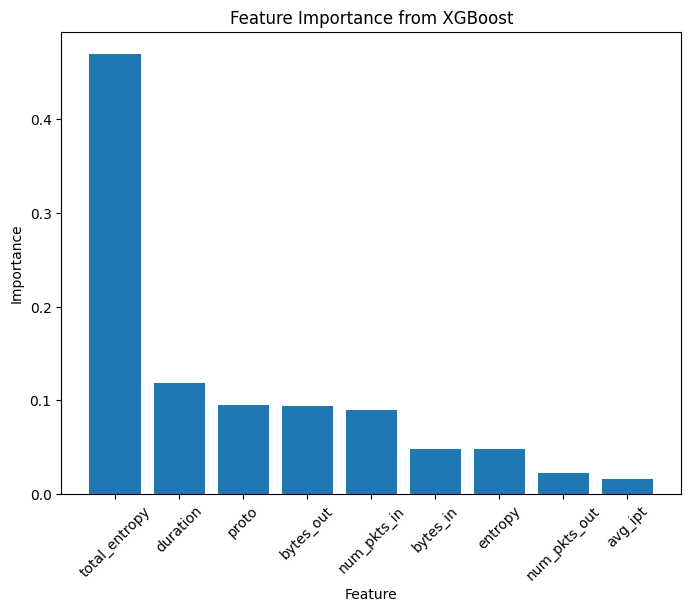

In [55]:
importances = xgbmodel.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(feature_names)[indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance from XGBoost")
plt.show()

In [36]:
y_train_pred = xgbmodel.predict(X_train)
y_val_pred = xgbmodel.predict(X_val)
y_test_pred = xgbmodel.predict(X_test)
accuracy_train = accuracy_score(y_train,y_train_pred)
accuracy_val = accuracy_score(y_val, y_val_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("The accuracy of XGB model is {}".format(accuracy_train))
print("The accuracy of XGB model is {}".format(accuracy_val))
print("The accuracy of XGB model is {}".format(accuracy_test))
print(classification_report(y_val,y_val_pred))

The accuracy of XGB model is 0.8447568041350064
The accuracy of XGB model is 0.8432311896332451
The accuracy of XGB model is 0.842179209005564
              precision    recall  f1-score   support

           0       0.99      0.87      0.93     77582
           1       0.70      0.92      0.80     77581
           2       0.91      0.74      0.82     77581

    accuracy                           0.84    232744
   macro avg       0.87      0.84      0.85    232744
weighted avg       0.87      0.84      0.85    232744



<Axes: >

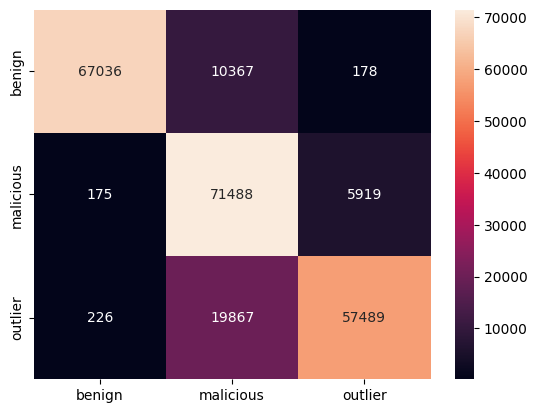

In [37]:
cm = confusion_matrix(y_test,y_test_pred)

sns.heatmap(cm, annot=True, fmt ='g', xticklabels=["benign","malicious", "outlier"], yticklabels=["benign","malicious","outlier"])

In [ ]:
print(xgbmodel.feature_importances_)
# plot
plt.bar(["avg_ipt","bytes_in","bytes_out","entropy","num_pkts_out","num_pkts_in","proto","total_entropy","duration"], xgbmodel.feature_importances_)
plt.show()

Decision Tree Classifier

In [38]:
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train,y_train)
importances = clf.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(feature_names)[indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance from Decision Tree")
plt.show()

DecisionTreeClassifier(random_state=0)

In [39]:
y_train_pred = dtc.predict(X_train)
y_val_pred = dtc.predict(X_val)
y_test_pred = dtc.predict(X_test)
accuracy_train = accuracy_score(y_train,y_train_pred)
accuracy_val = accuracy_score(y_val, y_val_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("The accuracy of Decision Tree model is {}".format(accuracy_train))
print("The accuracy of Decision Tree model is {}".format(accuracy_val))
print("The accuracy of Decision Tree model is {}".format(accuracy_test))
print(classification_report(y_val,y_val_pred))

The accuracy of Decision Tree model is 0.8669813587738608
The accuracy of Decision Tree model is 0.8475922043103152
The accuracy of Decision Tree model is 0.8460632881479732
              precision    recall  f1-score   support

           0       1.00      0.87      0.93     77582
           1       0.71      0.94      0.81     77581
           2       0.92      0.74      0.82     77581

    accuracy                           0.85    232744
   macro avg       0.87      0.85      0.85    232744
weighted avg       0.87      0.85      0.85    232744



<Axes: >

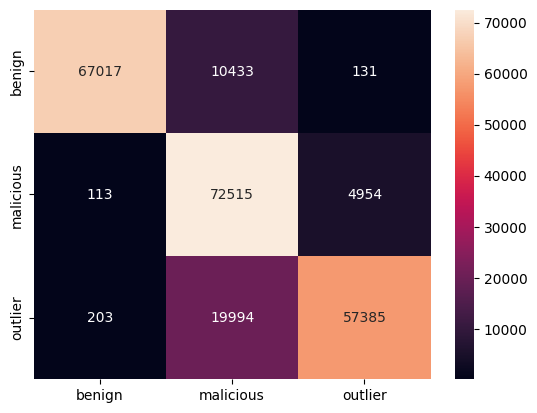

In [40]:
cm = confusion_matrix(y_test,y_test_pred)

sns.heatmap(cm, annot=True, fmt ='g', xticklabels=["benign","malicious", "outlier"], yticklabels=["benign","malicious","outlier"])

#Section IV : Deep Learning Models

In [41]:
encoder = LabelEncoder()
encoder.fit(y_resampled)
encoded_Y = encoder.transform(y_resampled)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = utils.to_categorical(encoded_Y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [42]:
X_train, X_temp, y_train_one_hot, y_temp_one_hot = train_test_split(X_resampled, dummy_y, test_size=0.3, random_state=42)
X_val, X_test, y_val_one_hot, y_test_one_hot = train_test_split(X_temp, y_temp_one_hot, test_size=0.5, random_state=42)

Neural Net

In [43]:
model = Sequential()
model.add(Dense(64, input_dim=9, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train_one_hot, epochs=10, batch_size=64, validation_data=(X_val, y_val_one_hot))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test_one_hot)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

Epoch 1/10
16971/16971 [==============================] - 75s 4ms/step - loss: 0.5281 - accuracy: 0.7707 - val_loss: 0.4904 - val_accuracy: 0.7949
Epoch 2/10
16971/16971 [==============================] - 42s 2ms/step - loss: 0.4773 - accuracy: 0.8011 - val_loss: 0.4712 - val_accuracy: 0.8044
Epoch 3/10
16971/16971 [==============================] - 48s 3ms/step - loss: 0.4646 - accuracy: 0.8070 - val_loss: 0.4609 - val_accuracy: 0.8101
Epoch 4/10
16971/16971 [==============================] - 42s 2ms/step - loss: 0.4596 - accuracy: 0.8100 - val_loss: 0.4570 - val_accuracy: 0.8115
Epoch 5/10
16971/16971 [==============================] - 44s 3ms/step - loss: 0.4566 - accuracy: 0.8114 - val_loss: 0.4537 - val_accuracy: 0.8110
Epoch 6/10
16971/16971 [==============================] - 42s 2ms/step - loss: 0.4545 - accuracy: 0.8119 - val_loss: 0.4551 - val_accuracy: 0.8123
Epoch 7/10
16971/16971 [==============================] - 39s 2ms/step - loss: 0.4525 - accuracy: 0.8122 - val_loss: 0

7274/7274 [==============================] - 11s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91     77365
           1       0.68      0.88      0.77     77967
           2       0.84      0.70      0.77     77413

    accuracy                           0.81    232745
   macro avg       0.83      0.81      0.82    232745
weighted avg       0.83      0.81      0.82    232745



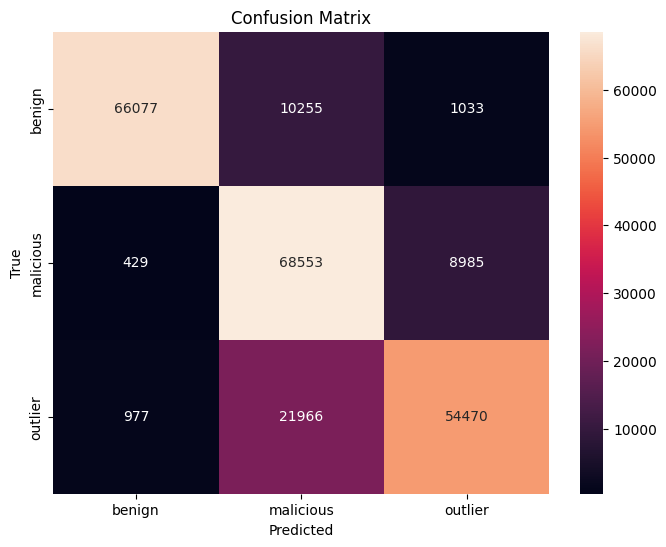

In [44]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
y_test = np.argmax(y_test_one_hot, axis=1)

# Create a classification report
print("Classification Report:")
print(classification_report(y_test, predicted_labels))

# Create a confusion matrix
cm = confusion_matrix(y_test, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', xticklabels=["benign","malicious", "outlier"], yticklabels=["benign","malicious","outlier"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Long Short Term Memory

In [45]:
X_lstm_resampled = X_resampled
y_lstm_resampled = y_resampled

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_lstm_resampled)

# Convert labels to one-hot encoding
y_one_hot_dummy = utils.to_categorical(y_encoded, num_classes=3)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
X_resampled_np = X_lstm_resampled.values

In [47]:
X_train, X_temp, y_train_one_hot, y_temp_one_hot = train_test_split(X_resampled_np, y_one_hot_dummy, test_size=0.3,stratify=y_resampled,random_state=45)
X_val, X_test, y_val_one_hot, y_test_one_hot = train_test_split(X_temp, y_temp_one_hot, test_size=0.5,stratify=y_temp_one_hot,random_state=45)

In [48]:
time_steps = 1
num_features = X.shape[1]
X_train_reshaped = X_train.reshape((X_train.shape[0], time_steps, num_features))
X_val_reshaped = X_val.reshape((X_val.shape[0],time_steps,num_features))
X_test_reshaped = X_test.reshape((X_test.shape[0], time_steps, num_features))


In [49]:
model = Sequential()
model.add(LSTM(10, input_shape=(time_steps, num_features)))
model.add(Dense(3, activation='softmax'))

In [51]:
model.compile(loss='categorical_crossentropy', optimizer=Nadam(learning_rate=0.01), metrics=['accuracy'])
print(X_train_reshaped.shape)
print(y_train_one_hot.shape)
# Train the model
model.fit(X_train_reshaped, y_train_one_hot, epochs=10, batch_size=32, validation_data=(X_val_reshaped, y_val_one_hot))

(1086141, 1, 9)
(1086141, 3)
Epoch 1/10
33942/33942 [==============================] - 136s 4ms/step - loss: 0.4540 - accuracy: 0.8106 - val_loss: 0.4489 - val_accuracy: 0.8094
Epoch 2/10
33942/33942 [==============================] - 129s 4ms/step - loss: 0.4481 - accuracy: 0.8141 - val_loss: 0.4520 - val_accuracy: 0.8167
Epoch 3/10
33942/33942 [==============================] - 137s 4ms/step - loss: 0.4445 - accuracy: 0.8156 - val_loss: 0.4435 - val_accuracy: 0.8166
Epoch 4/10
33942/33942 [==============================] - 146s 4ms/step - loss: 0.4421 - accuracy: 0.8166 - val_loss: 0.4447 - val_accuracy: 0.8166
Epoch 5/10
33942/33942 [==============================] - 130s 4ms/step - loss: 0.4405 - accuracy: 0.8172 - val_loss: 0.4410 - val_accuracy: 0.8167
Epoch 6/10
33942/33942 [==============================] - 136s 4ms/step - loss: 0.4392 - accuracy: 0.8174 - val_loss: 0.4430 - val_accuracy: 0.8149
Epoch 7/10
33942/33942 [==============================] - 138s 4ms/step - loss: 0.4

In [52]:
loss, accuracy = model.evaluate(X_test_reshaped, y_test_one_hot)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

7274/7274 [==============================] - 15s 2ms/step - loss: 0.4358 - accuracy: 0.8170
Test Loss: 0.43582841753959656, Test Accuracy: 0.8169541954994202


7274/7274 [==============================] - 21s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.85      0.92     77582
           1       0.68      0.90      0.77     77582
           2       0.86      0.70      0.77     77581

    accuracy                           0.82    232745
   macro avg       0.84      0.82      0.82    232745
weighted avg       0.84      0.82      0.82    232745



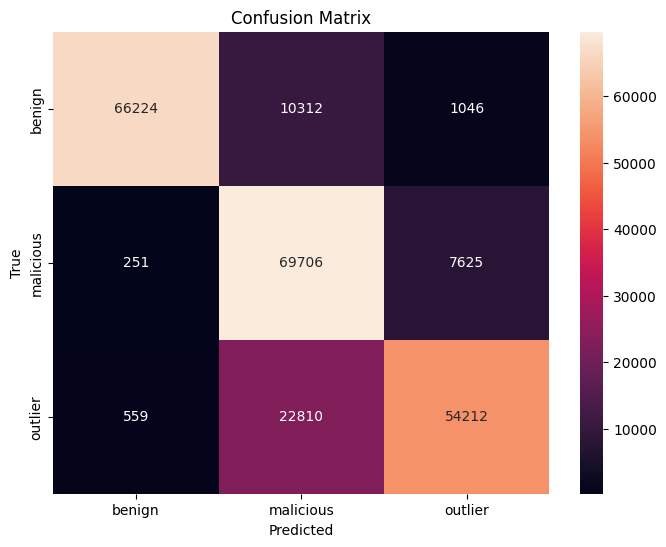

In [53]:
predictions = model.predict(X_test_reshaped)
predicted_labels = np.argmax(predictions, axis=1)
y_test = np.argmax(y_test_one_hot, axis=1)

# Create a classification report
print("Classification Report:")
print(classification_report(y_test, predicted_labels))

# Create a confusion matrix
cm = confusion_matrix(y_test, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', xticklabels=["benign","malicious", "outlier"], yticklabels=["benign","malicious","outlier"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()